In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch
import seaborn as sns
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorNeuropixelsProjectCache

sns.set_style('ticks')



### Create cache

In [2]:
drive_dir = "/Volumes/Brain2024"
cache = VisualBehaviorNeuropixelsProjectCache.from_local_cache(cache_dir=drive_dir, use_static_cache=True)

cache.list_manifest_file_names() # Okay we just load the latest version

In [4]:
behavior_sessions = cache.get_behavior_session_table()

In [5]:
behavior_sessions = cache.get_behavior_session_table()
print(f"Total number of behavior sessions: {len(behavior_sessions)}")

print()
types = behavior_sessions.session_type.unique()
print("Unique types of sessions (Training/Recording):")
print()
for i, session_type in enumerate(types, start=1):
    print(f"{i}. {session_type}")

Total number of behavior sessions: 3424

Unique types of sessions (Training/Recording):

1. HABITUATION_5_images_G_handoff_ready_5uL_reward
2. TRAINING_1_gratings
3. TRAINING_2_gratings_flashed
4. TRAINING_5_images_G_epilogue
5. TRAINING_3_images_G_10uL_reward
6. TRAINING_4_images_G_training
7. TRAINING_0_gratings_autorewards_15min
8. HABITUATION_5_images_G_handoff_ready_3uL_reward
9. TRAINING_5_images_G_handoff_ready_5uL_reward
10. TRAINING_4_images_G_training_7uL_reward
11. TRAINING_2_gratings_flashed_10uL_reward
12. TRAINING_1_gratings_10uL_reward
13. TRAINING_0_gratings_autorewards_15min_0uL_reward
14. TRAINING_5_images_G_epilogue_5uL_reward
15. EPHYS_1_images_G_3uL_reward
16. TRAINING_5_images_G_handoff_lapsed_5uL_reward
17. EPHYS_1_images_H_3uL_reward
18. HABITUATION_5_images_H_handoff_ready_5uL_reward
19. HABITUATION_5_images_H_handoff_ready_3uL_reward
20. TRAINING_5_images_H_handoff_ready_5uL_reward
21. TRAINING_3_images_H_10uL_reward
22. TRAINING_4_images_H_training_7uL_reward

In [6]:
types = behavior_sessions.session_type.unique()
print("Unique types of EPHYS sessions:")
print()
ephys_types = [session_type for session_type in types if 'EPHYS' in session_type]

for i, session_type in enumerate(ephys_types, start=1):
    print(f"{i}. {session_type}")

Unique types of EPHYS sessions:

1. EPHYS_1_images_G_3uL_reward
2. EPHYS_1_images_H_3uL_reward
3. EPHYS_1_images_G_5uL_reward
4. EPHYS_1_images_H_5uL_reward


### Get access to behaviral data

In [7]:
# load example mice

mouse_id = 506940
print('Number of behaviral sessions for an example mouse:', len(behavior_sessions[behavior_sessions['mouse_id']== mouse_id]))

Number of behaviral sessions for an example mouse: 27


In [8]:
behavior_sessions_example_mouse = behavior_sessions[behavior_sessions['mouse_id']== mouse_id]

#### Get behavior trials directly from `cache.get_behavior_session()`

_Can also not get it from the ecephys_session?_

In [9]:
example_session = behavior_sessions_example_mouse.index[0]

In [10]:
# ecephys_session_id
session_id = 1053941483 # this one works
# session_id = example_session	
session = cache.get_ecephys_session(session_id)
metadata = session.metadata
metadata

/opt/anaconda3/envs/swdb2024/lib/python3.9/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)


{'equipment_name': 'NP.1',
 'sex': 'M',
 'age_in_days': 180,
 'stimulus_frame_rate': 60.0,
 'session_type': 'EPHYS_1_images_H_3uL_reward',
 'date_of_acquisition': datetime.datetime(2020, 10, 2, 0, 3, 58, tzinfo=tzutc()),
 'reporter_line': 'Ai32(RCL-ChR2(H134R)_EYFP)',
 'cre_line': 'Sst-IRES-Cre',
 'behavior_session_uuid': UUID('330937b4-ec9e-4bc4-8567-f74666f52596'),
 'driver_line': ['Sst-IRES-Cre'],
 'mouse_id': '527749',
 'project_code': 'Not Available',
 'full_genotype': 'Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt',
 'behavior_session_id': 1053960987,
 'ecephys_session_id': 1053941483}

In [11]:
trials = session.trials
trials.head()

,start_time,stop_time,initial_image_name,change_image_name,is_change,change_time_no_display_delay,go,catch,lick_times,response_time,reward_time,reward_volume,hit,false_alarm,miss,correct_reject,aborted,auto_rewarded,change_frame,trial_length
trials_id,,,,,,,,,,,,,,,,,,,,
0,25.20983,26.19343,im104_r,im104_r,False,NaN,False,False,"[25.72637, 25.87602]",NaN,NaN,0.0,False,False,False,False,True,False,-99,0.98360
1,26.71046,28.34528,im104_r,im104_r,False,NaN,False,False,[28.02817],NaN,NaN,0.0,False,False,False,False,True,False,-99,1.63482
2,28.96234,32.73245,im104_r,im104_r,False,NaN,False,False,[32.39844],NaN,NaN,0.0,False,False,False,False,True,False,-99,3.77011
3,33.46618,35.85175,im104_r,im104_r,False,NaN,False,False,[35.53463],NaN,NaN,0.0,False,False,False,False,True,False,-99,2.38557
4,36.46863,39.62138,im104_r,im104_r,False,NaN,False,False,"[39.15441, 39.28716]",NaN,NaN,0.0,False,False,False,False,True,False,-99,3.15275


In [12]:
trials.tail()

,start_time,stop_time,initial_image_name,change_image_name,is_change,change_time_no_display_delay,go,catch,lick_times,response_time,reward_time,reward_volume,hit,false_alarm,miss,correct_reject,aborted,auto_rewarded,change_frame,trial_length
trials_id,,,,,,,,,,,,,,,,,,,,
595,3611.49208,3618.76483,im083_r,im024_r,True,3614.49490,True,False,"[3614.97902, 3615.11108, 3615.22784, 3615.3446...",3614.97902,3614.97902,0.003,True,False,False,False,False,False,215234,7.27275
596,3618.99803,3619.59865,im024_r,im024_r,False,NaN,False,False,[3619.28223],NaN,NaN,0.000,False,False,False,False,True,False,-99,0.60062
597,3619.74882,3622.36770,im024_r,im024_r,False,NaN,False,False,"[3621.73408, 3621.83335, 3621.9336, 3622.06724...",NaN,NaN,0.000,False,False,False,False,True,False,-99,2.61888
598,3622.75138,3623.11829,im024_r,im024_r,False,NaN,False,False,"[3622.81796, 3623.23466]",NaN,NaN,0.000,False,False,False,False,True,False,-99,0.36691
599,3623.50198,3631.50933,im024_r,im024_r,False,3627.25499,False,True,[],NaN,NaN,0.000,False,False,False,True,False,False,215999,8.00735


_or frome the behavior_session directly:_

Can get ids from `behavior_sessions_table`-- which contains metadata for each behavior session. Some behavior sessions have Neuropixels data associated with them, while others took place during training in the behavior facility. The different training stages that mice progressed through are described by the session_type

In [13]:
metadata

{'equipment_name': 'NP.1',
 'sex': 'M',
 'age_in_days': 180,
 'stimulus_frame_rate': 60.0,
 'session_type': 'EPHYS_1_images_H_3uL_reward',
 'date_of_acquisition': datetime.datetime(2020, 10, 2, 0, 3, 58, tzinfo=tzutc()),
 'reporter_line': 'Ai32(RCL-ChR2(H134R)_EYFP)',
 'cre_line': 'Sst-IRES-Cre',
 'behavior_session_uuid': UUID('330937b4-ec9e-4bc4-8567-f74666f52596'),
 'driver_line': ['Sst-IRES-Cre'],
 'mouse_id': '527749',
 'project_code': 'Not Available',
 'full_genotype': 'Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt',
 'behavior_session_id': 1053960987,
 'ecephys_session_id': 1053941483}

In [14]:
# behavior_session_id = metadata['behavior_session_id']
behavior_session_id = 1053960987

In [15]:
behavior_session = cache.get_behavior_session(behavior_session_id)

/opt/anaconda3/envs/swdb2024/lib/python3.9/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)


In [16]:
cache.get_behavior_session_table().loc[behavior_session_id]

equipment_name                                                              NP.1
genotype                           Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
mouse_id                                                                  527749
sex                                                                            M
age_in_days                                                                  180
session_number                                                                57
prior_exposures_to_session_type                                                0
prior_exposures_to_image_set                                                   0
prior_exposures_to_omissions                                                   1
ecephys_session_id                                                    1053941483
date_of_acquisition                             2020-10-01 17:03:58.362000+00:00
session_type                                         EPHYS_1_images_H_3uL_reward
image_set                   

In [17]:
behavior_session.list_data_attributes_and_methods()

['behavior_session_id',
 'eye_tracking',
 'eye_tracking_rig_geometry',
 'get_performance_metrics',
 'get_reward_rate',
 'get_rolling_performance_df',
 'licks',
 'metadata',
 'raw_running_speed',
 'rewards',
 'running_speed',
 'stimulus_presentations',
 'stimulus_templates',
 'stimulus_timestamps',
 'task_parameters',
 'trials']

In [18]:
behavior_session.trials.tail()

,start_time,stop_time,initial_image_name,change_image_name,is_change,change_time_no_display_delay,go,catch,lick_times,response_time,reward_time,reward_volume,hit,false_alarm,miss,correct_reject,aborted,auto_rewarded,change_frame,trial_length
trials_id,,,,,,,,,,,,,,,,,,,,
595,3611.49208,3618.76483,im083_r,im024_r,True,3614.49490,True,False,"[3614.97902, 3615.11108, 3615.22784, 3615.3446...",3614.97902,3614.97902,0.003,True,False,False,False,False,False,215234,7.27275
596,3618.99803,3619.59865,im024_r,im024_r,False,NaN,False,False,[3619.28223],NaN,NaN,0.000,False,False,False,False,True,False,-99,0.60062
597,3619.74882,3622.36770,im024_r,im024_r,False,NaN,False,False,"[3621.73408, 3621.83335, 3621.9336, 3622.06724...",NaN,NaN,0.000,False,False,False,False,True,False,-99,2.61888
598,3622.75138,3623.11829,im024_r,im024_r,False,NaN,False,False,"[3622.81796, 3623.23466]",NaN,NaN,0.000,False,False,False,False,True,False,-99,0.36691
599,3623.50198,3631.50933,im024_r,im024_r,False,3627.25499,False,True,[],NaN,NaN,0.000,False,False,False,True,False,False,215999,8.00735


In [19]:
trials.columns 

Index(['start_time', 'stop_time', 'initial_image_name', 'change_image_name',
       'is_change', 'change_time_no_display_delay', 'go', 'catch',
       'lick_times', 'response_time', 'reward_time', 'reward_volume', 'hit',
       'false_alarm', 'miss', 'correct_reject', 'aborted', 'auto_rewarded',
       'change_frame', 'trial_length'],
      dtype='object')

It's the same thing!

__Some more info about attributes in `behavior_session`:__

In [20]:
help(behavior_session.get_reward_rate)

Help on method get_reward_rate in module allensdk.brain_observatory.behavior.behavior_session:

get_reward_rate() -> numpy.ndarray method of allensdk.brain_observatory.behavior.behavior_session.BehaviorSession instance
    Get the reward rate of the subject for the task calculated over a
    25 trial rolling window and provides a measure of the rewards
    earned per unit time (in units of rewards/minute).
    
    Returns
    -------
    np.ndarray
        The reward rate (rewards/minute) of the subject for the
        task calculated over a 25 trial rolling window.



In [21]:
behavior_session.get_performance_metrics()

{'trial_count': 600,
 'go_trial_count': 295,
 'catch_trial_count': 44,
 'hit_trial_count': 139,
 'miss_trial_count': 156,
 'false_alarm_trial_count': 1,
 'correct_reject_trial_count': 43,
 'auto_reward_count': 3,
 'earned_reward_count': 139,
 'total_reward_count': 142,
 'total_reward_volume': 0.43199999999999994,
 'maximum_reward_rate': 5.033826263778787,
 'engaged_trial_count': 440,
 'mean_hit_rate': 0.47388024381123905,
 'mean_hit_rate_uncorrected': 0.4765842752763324,
 'mean_hit_rate_engaged': 0.535890015217069,
 'mean_false_alarm_rate': 0.06851317111891128,
 'mean_false_alarm_rate_uncorrected': 0.02273562288668029,
 'mean_false_alarm_rate_engaged': 0.06896672016964904,
 'mean_dprime': 1.4274968629298022,
 'mean_dprime_engaged': 1.6116689051369812,
 'max_dprime': 2.2015497100616526,
 'max_dprime_engaged': 2.2015497100616526}

In [22]:
len(behavior_session.get_reward_rate()) # how is this defined? (for every trail actually)

600

<span style="color:orange">__Notes__:</span> that `trails` do not contain information about the the stimulus content

<span style="color:orange">__Question__:</span> what exactly compose of a trial? See `definition.md` and below plotting


### Also useful, stimulus table

In [23]:
stim_table = behavior_session.stimulus_presentations

In [24]:
print("# of stimulus presentations in session:", len(stim_table))

# of stimulus presentations in session: 13405


In [25]:
print("# of stimulus presentations in active session:",np.sum(stim_table['active']))

# of stimulus presentations in active session: 4804


### Visualize behavior trial data on raster plot


In [26]:
start_time = 400
end_time = start_time +80

trials_for_plot = trials[(trials.start_time>start_time) & (trials.start_time<end_time)]
stim_times = stim_table[(stim_table.start_time>start_time) & (stim_table.start_time<end_time)]

# What are the unique stimulus image names
unique_stim = stim_times.image_name.unique()
print(unique_stim)

['im104_r' 'im083_r' 'im034_r' 'omitted' 'im114_r' 'im111_r' 'im024_r']


In [27]:
print(f"Plotting {len(trials_for_plot)} example trails.")

Plotting 10 example trails.


In [28]:
# Map color to each image
colors = ['blue','green','purple','gray', 'yellow', 'orange', 'red']
color_stim_dict = dict(zip(unique_stim,colors))
color_stim_dict

{'im104_r': 'blue',
 'im083_r': 'green',
 'im034_r': 'purple',
 'omitted': 'gray',
 'im114_r': 'yellow',
 'im111_r': 'orange',
 'im024_r': 'red'}

In [29]:
# Get lick times
lick_times = trials_for_plot.lick_times.values
lick_times = np.concatenate(lick_times) # Flatten array of arrays to 1D array
reward_times = trials_for_plot.reward_time.values

In [30]:
# Define color map for performance types
performance_color_map = {
    'hit': 'blue',
    'miss': 'red',
    'aborted': 'yellow',
    'correct_reject': 'green',
    'auto_rewarded': 'purple',
    'false_alarm': 'orange'
}

# Create a new 'performance' column
def get_performance(row):
    for perf_type in ['hit', 'miss', 'aborted', 'correct_reject']:
        if row[perf_type]:
            return perf_type
    return 'unknown'  # In case none of the columns are True

trials_for_plot['performance'] = trials_for_plot.apply(get_performance, axis=1)

/var/folders/45/vxs3qxtn0ql1mmj2dm1w3zxw0000gp/T/ipykernel_63140/334846785.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials_for_plot['performance'] = trials_for_plot.apply(get_performance, axis=1)


In [31]:
plot_dir = 'plots/explore/'

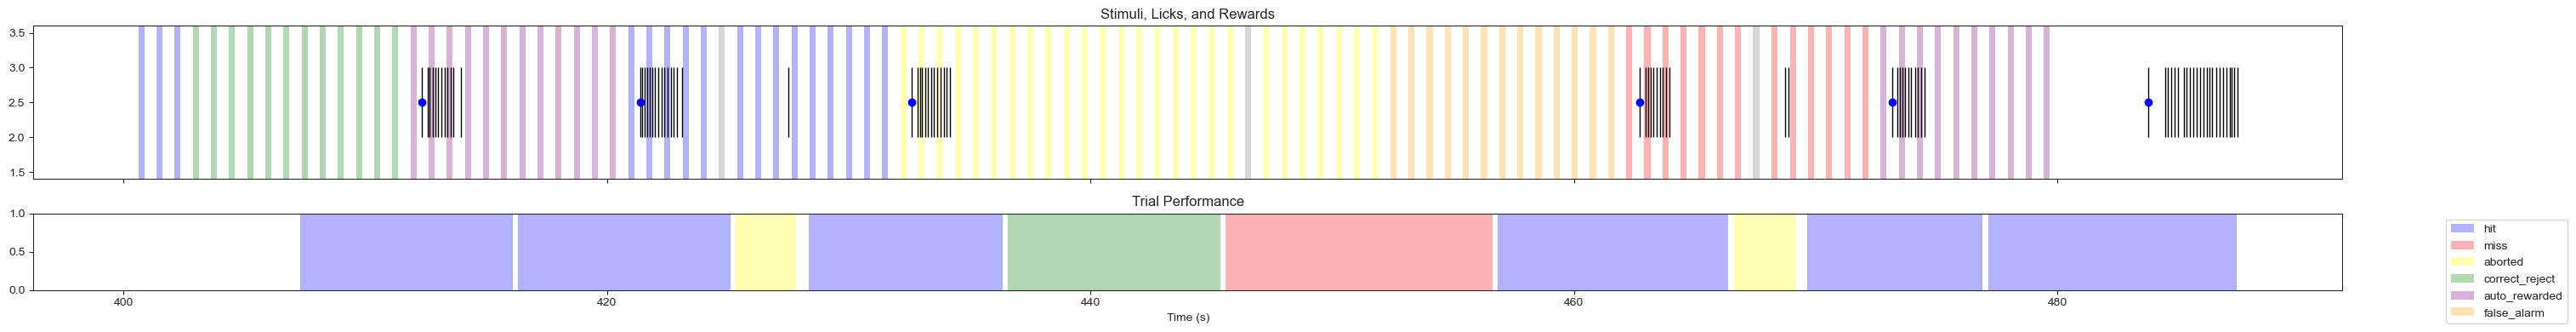

In [32]:
# Create a figure with two subplots, one on top of the other
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 4), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# First subplot (original plot)
# Plot stimulus times
for row in stim_times.iterrows():
    t_start = row[1].start_time
    ax1.axvspan(t_start, t_start+0.25, alpha=0.3, color=color_stim_dict[row[1].image_name], lw=0)

# Plot lick and reward times
ax1.eventplot(lick_times, lineoffsets=2.5, color='black', linewidth=1)
ax1.plot(reward_times, np.ones_like(reward_times)*2.5, color='blue', marker='o', linestyle='')

# Second subplot (trials)
for _, trial in trials_for_plot.iterrows():
    color = performance_color_map.get(trial.performance, 'gray')  # Use 'gray' if performance is unknown
    ax2.axvspan(trial.start_time, trial.stop_time, alpha=0.3, color=color, lw=0)

# Add labels and title
ax1.set_title('Stimuli, Licks, and Rewards')
ax2.set_title('Trial Performance')
ax2.set_xlabel('Time (s)')

# Remove x-axis label from the top subplot
ax1.set_xlabel('')

# Add a legend for the second subplot
legend_elements = [Patch(facecolor=color, edgecolor='none', alpha=0.3, label=perf_type) 
                   for perf_type, color in performance_color_map.items()]
ax2.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.1, 1))

# Adjust layout and display
plt.tight_layout()
plt.show()

# fig.savefig(f'{plot_dir}example_session_period.pdf')
# fig.savefig(f'{plot_dir}example_session_period.png')

### All possible behavioral outcomes?

In [33]:
trials.columns

Index(['start_time', 'stop_time', 'initial_image_name', 'change_image_name',
       'is_change', 'change_time_no_display_delay', 'go', 'catch',
       'lick_times', 'response_time', 'reward_time', 'reward_volume', 'hit',
       'false_alarm', 'miss', 'correct_reject', 'aborted', 'auto_rewarded',
       'change_frame', 'trial_length'],
      dtype='object')

Great! There actually exactly four possibilities.

In [34]:
boolean_columns = ['hit', 'miss', 'auto_rewarded', 'correct_reject', 'aborted', 'false_alarm']

# Check if only one column is True for each row
only_one_true = (trials[boolean_columns].sum(axis=1) == 1)

# Check if at least one column is True for each row
at_least_one_true = (trials[boolean_columns].sum(axis=1) >= 1)

# Results
print(f"Total number of rows: {len(trials)}")
print(f"Rows with exactly one True value: {only_one_true.sum()}")
print(f"Rows with at least one True value: {at_least_one_true.sum()}")

# Check if all rows have exactly one True value
if only_one_true.all():
    print("\nAll rows have exactly one True value among the specified columns.")
else:
    print("Some rows do not have exactly one True value among the specified columns.")
    
    # Identify problematic rows
    problematic_rows = trials[~only_one_true]
    print(f"\nNumber of problematic rows: {len(problematic_rows)}")
    print("\nFirst few problematic rows:")
    print(problematic_rows[boolean_columns].head())

# Check if all rows have at least one True value
if at_least_one_true.all():
    print("\nAll rows have at least one True value among the specified columns.")
else:
    print("\nSome rows do not have any True value among the specified columns.")
    
    # Identify rows with no True values
    no_true_rows = trials[~at_least_one_true]
    print(f"\nNumber of rows with no True values: {len(no_true_rows)}")
    print("\nFirst few rows with no True values:")
    print(no_true_rows[boolean_columns].head())

Total number of rows: 600
Rows with exactly one True value: 600
Rows with at least one True value: 600

All rows have exactly one True value among the specified columns.

All rows have at least one True value among the specified columns.


In [35]:
def get_performance(row):
    for column in ['hit', 'miss', 'auto_rewarded', 'correct_reject', 'aborted', 'false_alarm']:
        if row[column]:
            return column
    return 'unknown'  # This should never happen based on our previous check, but it's good practice to have a default

# Create the new 'performance' column
trials['performance'] = trials.apply(get_performance, axis=1)

# Optional: Check if 'unknown' appears in the performance column (it shouldn't)
if 'unknown' in trials['performance'].values:
    print("\nWarning: 'unknown' value found in performance column!")
else:
    print("\nAll rows have been successfully categorized.")


All rows have been successfully categorized.


In [36]:
trials['performance'].value_counts()

aborted           258
miss              156
hit               139
correct_reject     43
auto_rewarded       3
false_alarm         1
Name: performance, dtype: int64

In [37]:
np.sum(trials.is_change)

298

`is_change` 298 = `miss` 156 + `hit` 139 + `auto_rewarded` 3

<span style="color:orange">__Comment__:</span> Reward related sensory stimuli is actually pretty scarse!

For ~`5000` images shown, only `298` ended up being the change

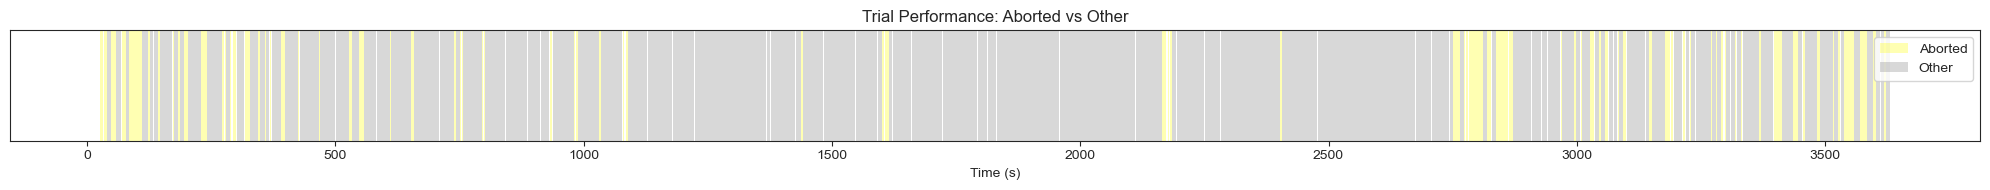

In [38]:

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(20, 2))  # Adjust the figure size for a flat and long plot

# Plot trials
for _, trial in trials.iterrows():
    color = 'yellow' if trial.aborted == True else 'gray'
    ax.axvspan(trial.start_time, trial.stop_time, alpha=0.3, color=color, lw=0)

# # Set the x-axis limits
# ax.set_xlim(0, 1000)

# Remove y-axis ticks as they're not meaningful in this context
ax.set_yticks([])

# Add labels and title
ax.set_xlabel('Time (s)')
ax.set_title('Trial Performance: Aborted vs Other')


legend_elements = [Patch(facecolor='yellow', edgecolor='none', alpha=0.3, label='Aborted'),
                   Patch(facecolor='gray', edgecolor='none', alpha=0.3, label='Other')]
ax.legend(handles=legend_elements, loc='upper right')

# Adjust layout and display
plt.tight_layout()
plt.show()
fig.savefig(f'{plot_dir}aborted_entire_session.png')
fig.savefig(f'{plot_dir}aborted_entire_session.pdf')

In [39]:
trials['aborted'].sum()

258

In [40]:
# Create a helper column to identify clusters of aborted trials
trials['cluster_id'] = (trials['aborted'] != trials['aborted'].shift()).cumsum()

# Filter for aborted trials and group by cluster_id
aborted_groups = trials[trials['aborted']].groupby('cluster_id')

# Create the aborted_cluster_df
aborted_cluster_df = pd.DataFrame({
    'start_row_index': aborted_groups.apply(lambda x: x.index[0]),  # This gets the original index
    'start_time': aborted_groups['start_time'].first(),
    'end_time': aborted_groups['stop_time'].last(),
    'duration': aborted_groups['stop_time'].last() - aborted_groups['start_time'].first(),
    'num_trials': aborted_groups.size()
})

# Reset index for cleaner output
aborted_cluster_df = aborted_cluster_df.reset_index(drop=True)

# Optional: Remove the helper column from the original dataframe
trials = trials.drop('cluster_id', axis=1)

# Print some summary statistics
print(f"\nTotal number of aborted trial clusters: {len(aborted_cluster_df)}")
print(f"Maximum number of consecutive aborted trials: {aborted_cluster_df['num_trials'].max()}")
print(f"Average duration of aborted trial clusters: {aborted_cluster_df['duration'].mean():.2f} seconds")


Total number of aborted trial clusters: 73
Maximum number of consecutive aborted trials: 23
Average duration of aborted trial clusters: 7.34 seconds


In [41]:
aborted_cluster_df[aborted_cluster_df['num_trials']== 23]

,start_row_index,start_time,end_time,duration,num_trials
37,385,2773.60723,2810.4717,36.86447,23


In [42]:
trials.iloc[385:385+ 23].aborted.sum()

23

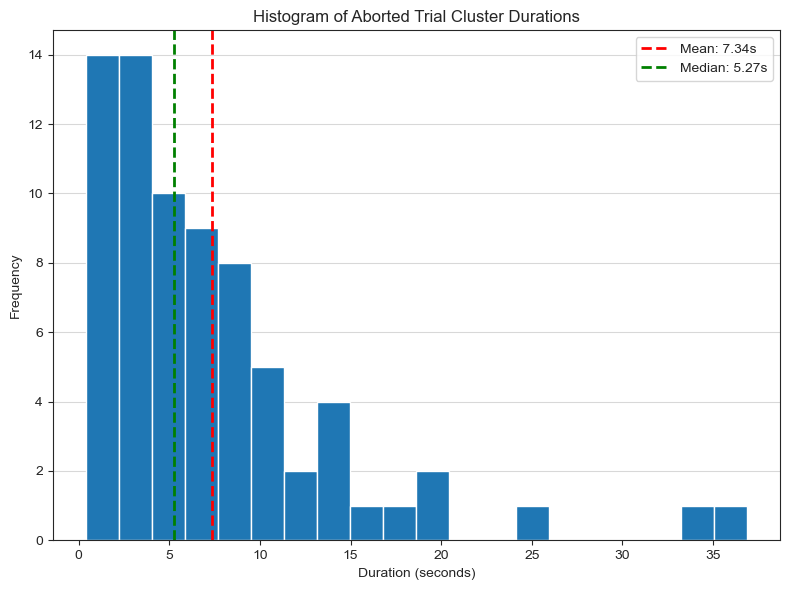

Mean duration: 7.34 seconds
Median duration: 5.27 seconds
Min duration: 0.40 seconds
Max duration: 36.86 seconds


In [43]:
# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(aborted_cluster_df['duration'], bins=20)

# Add labels and title
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Aborted Trial Cluster Durations')

# Add grid for better readability
plt.grid(axis='y', alpha=0.75)

# Display mean and median as vertical lines
mean_duration = aborted_cluster_df['duration'].mean()
median_duration = aborted_cluster_df['duration'].median()

plt.axvline(mean_duration, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_duration:.2f}s')
plt.axvline(median_duration, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_duration:.2f}s')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print some additional statistics
print(f"Mean duration: {mean_duration:.2f} seconds")
print(f"Median duration: {median_duration:.2f} seconds")
print(f"Min duration: {aborted_cluster_df['duration'].min():.2f} seconds")
print(f"Max duration: {aborted_cluster_df['duration'].max():.2f} seconds")

### Performance composition

In [44]:
trials['duration'] = trials['stop_time'] - trials['start_time']
performance_durations = trials.groupby('performance')['duration'].sum().sort_values(ascending=False)

performance_durations

performance
miss              1333.32906
hit               1223.90637
aborted            473.39013
correct_reject     364.44783
auto_rewarded       25.55474
false_alarm         11.77681
Name: duration, dtype: float64

In [45]:
trials

,start_time,stop_time,initial_image_name,change_image_name,is_change,change_time_no_display_delay,go,catch,lick_times,response_time,...,hit,false_alarm,miss,correct_reject,aborted,auto_rewarded,change_frame,trial_length,performance,duration
trials_id,,,,,,,,,,,,,,,,,,,,,
0,25.20983,26.19343,im104_r,im104_r,False,NaN,False,False,"[25.72637, 25.87602]",NaN,...,False,False,False,False,True,False,-99,0.98360,aborted,0.98360
1,26.71046,28.34528,im104_r,im104_r,False,NaN,False,False,[28.02817],NaN,...,False,False,False,False,True,False,-99,1.63482,aborted,1.63482
2,28.96234,32.73245,im104_r,im104_r,False,NaN,False,False,[32.39844],NaN,...,False,False,False,False,True,False,-99,3.77011,aborted,3.77011
3,33.46618,35.85175,im104_r,im104_r,False,NaN,False,False,[35.53463],NaN,...,False,False,False,False,True,False,-99,2.38557,aborted,2.38557
4,36.46863,39.62138,im104_r,im104_r,False,NaN,False,False,"[39.15441, 39.28716]",NaN,...,False,False,False,False,True,False,-99,3.15275,aborted,3.15275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,3611.49208,3618.76483,im083_r,im024_r,True,3614.49490,True,False,"[3614.97902, 3615.11108, 3615.22784, 3615.3446...",3614.97902,...,True,False,False,False,False,False,215234,7.27275,hit,7.27275
596,3618.99803,3619.59865,im024_r,im024_r,False,NaN,False,False,[3619.28223],NaN,...,False,False,False,False,True,False,-99,0.60062,aborted,0.60062
597,3619.74882,3622.36770,im024_r,im024_r,False,NaN,False,False,"[3621.73408, 3621.83335, 3621.9336, 3622.06724...",NaN,...,False,False,False,False,True,False,-99,2.61888,aborted,2.61888


In [46]:
image_change_time = stim_table[stim_table['active'] & stim_table['is_change']]['start_time'].to_numpy()
# Calculate the inter-change intervals
inter_change_intervals = np.diff(image_change_time)

In [47]:
frame_numbers = stim_table[stim_table['active'] & stim_table['is_change']].index
# Calculate the inter-change # of frames
inter_change_frames= np.diff(frame_numbers)

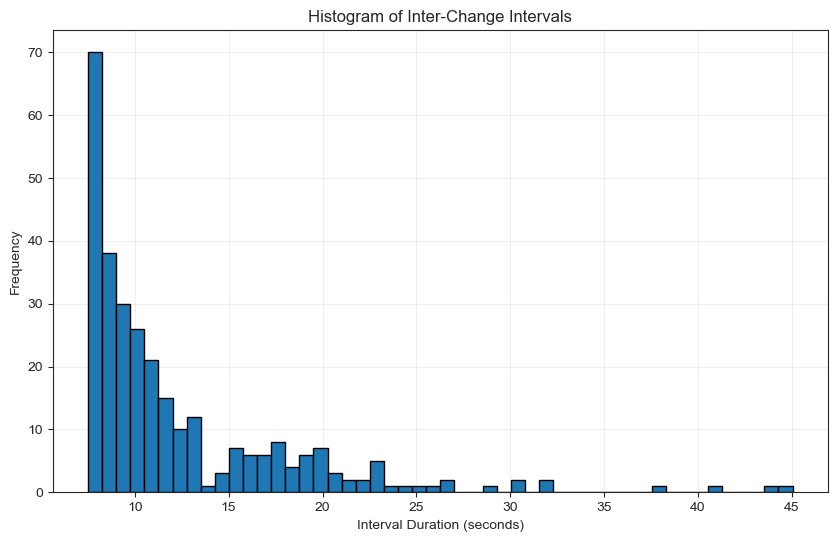

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(inter_change_intervals, bins=50, edgecolor='black')
plt.title('Histogram of Inter-Change Intervals')
plt.xlabel('Interval Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

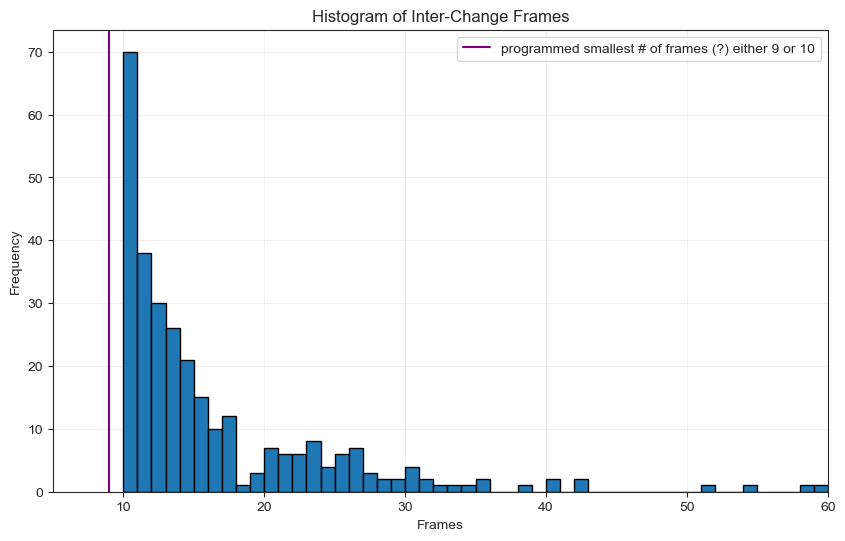

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(inter_change_frames, bins=50, edgecolor='black')
plt.title('Histogram of Inter-Change Frames')
plt.xlabel('Frames')
plt.ylabel('Frequency')
plt.axvline(x = 9, ymin = 0, ymax = 75, color = 'purple', label= 'programmed smallest # of frames (?) either 9 or 10')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim([5, 60])
plt.show()

### Lick bouts generation

Timing is wrt the conclusion of the last lick bout.

In [50]:
ili = np.diff(behavior_session.licks['timestamps'])

In [51]:
ili.max()

348.51285000000007

In [52]:
ili_bouts = ili[ili > .700]

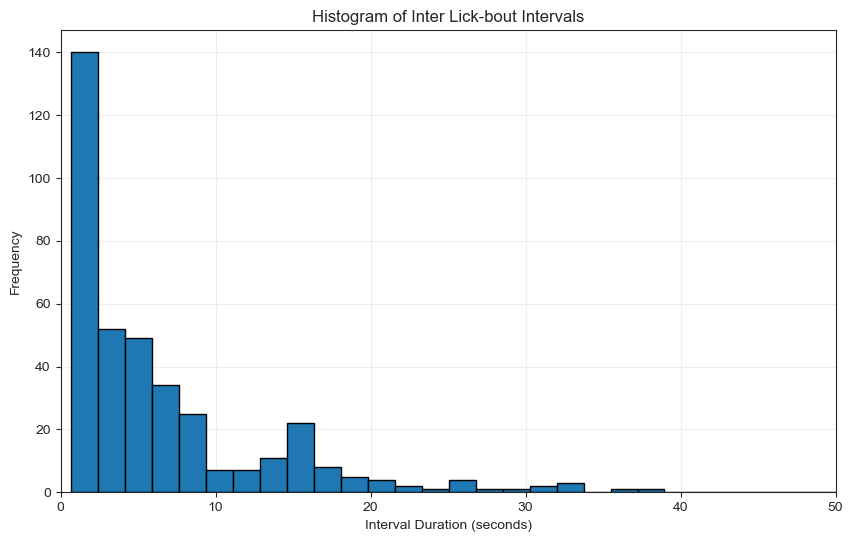

In [53]:
plt.figure(figsize=(10, 6))
plt.hist(ili_bouts, bins=200, edgecolor='black')
plt.title('Histogram of Inter Lick-bout Intervals')
plt.xlabel('Interval Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.xlim([0, 50])
plt.show()

In [54]:
print(f'inter lick bout mean duration: {ili_bouts.mean():.3f} s')

inter lick bout mean duration: 8.307 s
